Exercise 1: Simple Web Crawler (7 Points)
----------

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time       #wait 1 second for following url

In [2]:
#Parse soccerway

#url info
country_names_link = 'https://us.soccerway.com/international/world/world-cup/2022-qatar/group-stage/r49519/'

#an agent is needed to scrape the page
header = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"}

#Scrape it with requests and make it easier to handle with Beautifulsoup
country_names_get = requests.get(country_names_link, headers = header)
country_names_soup = BeautifulSoup(country_names_get.text) 
#country_names_soup

In [3]:
# Links are all in a 'text team large-link' class
names_links_raw = country_names_soup.findAll('td', class_ = 'text team large-link')
#print(names_links_raw)

# Exclude links from the other table in the site
names_links = names_links_raw[:-5]
#print(names_links)

In [4]:
#Retrieve country names
country_name = [country.find("a")["title"] #the link is in the title attribute of the fist 'a' id
                for country in names_links] #each part of names_links entails a country
#print(country_name)

In [6]:
#Retrieve links and ad missing part
soccerway_links = [f'https://us.soccerway.com/{country.find("a")["href"]}' #the link is in the href attribute of the 'a'
                for country in names_links] #each part of names_links entails a country
#print(soccerway_links)

In [7]:
#Create data frame with current info
countries_football = pd.DataFrame()
countries_football['country_name'] = country_name
countries_football['soccerway_links'] = soccerway_links
#countries_football #df

In [8]:
#Create a list with the matches link for every country 
links_matches = [f'{link}matches/'for link in soccerway_links]
#print(links_matches)

In [9]:
#Handy function to add to loop over links
def soup_fromlink(link, header = header):
    link_get = requests.get(link, headers = header)
    link_soup = BeautifulSoup(link_get.text) 
    return link_soup

In [10]:
#Collecting points for the last 5 matches before World Cup

#Header remains the same for all
header = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"}

# List to consolidate final sum for all countries
points_countries_bfWOC = [] 

#For loop to iterate over the links (countries)
for link in links_matches: #iterate over al links in list

    #Make a soup object with the link
    country_link_soup = soup_fromlink(link)
    
    matches = country_link_soup.findAll(attrs={"data-status": "Played"}) #find all rows that have "Played" matches
                                                                         #(avoids future matches)
    
    # Exclude World Cup results (if text in class competition is WOC don't add to the list)
    non_WOC = [match for match in matches if match.find('td', class_= "competition").get_text() != 'WOC']

    #select last 5
    last_5 = non_WOC[-5:] 

    #sum points
    points_nonWOC = 0
    for match in last_5:
        if match.find('a', class_ = 'result-draw'): #info about match result changes class 
            points_nonWOC += 1                      #(probably for colours in table)
        if match.find('a', class_ = 'result-win'):
            points_nonWOC += 3
        #no necesity to add losses due to 0 addition    
    points_countries_bfWOC.append(points_nonWOC) #append final result to general list


In [11]:
print(points_countries_bfWOC)

[13, 10, 7, 13, 3, 6, 10, 1, 7, 15, 6, 6, 5, 15, 9, 10, 12, 8, 13, 8, 15, 13, 7, 7, 15, 9, 5, 13, 9, 12, 10, 10]


In [12]:
#Add info to df
countries_football['points_bfWOC'] = points_countries_bfWOC
#countries_football #df

In [13]:
#Collecting points for the first World Cup match

#Header remains the same for all
header = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"}

# List to consolidate the info for all countries
countries_1stWOC = []

#For loop to iterate over the links (countries)
for link in links_matches:
    
    #Make a soup object with the link
    country_link_soup = soup_fromlink(link)   

    matches = country_link_soup.findAll(attrs={"data-status": "Played"}) #find all rows that have "Played" matches
                                                                         #(avoids future matches)

    #Get the last few matches so that the first of the World Cup is contained
    last_m = matches[-7:] #(max games played in WOC if getting to final or 3rd place match = 7)
    
    # If text in class competition is WOC add it to the list
    WOCS = [match for match in last_m if match.find('td', class_= "competition").get_text() == 'WOC']

    #Pick match in position 0 (first match)
    first_WOCmatch = WOCS[0]
    
    #Check for how many points it accounted for (same as above)
    point_1stWOC = 0
    if first_WOCmatch.find('a', class_ = 'result-draw'):
            point_1stWOC += 1
    elif first_WOCmatch.find('a', class_ = 'result-win'):
            point_1stWOC += 3
            
    countries_1stWOC.append(point_1stWOC)
    
    time.sleep(1) #wait a second to access again to the site

In [14]:
print(countries_1stWOC)

[3, 0, 3, 0, 3, 1, 0, 1, 1, 0, 3, 1, 3, 0, 1, 1, 3, 3, 0, 0, 1, 1, 3, 0, 3, 3, 0, 0, 3, 0, 1, 1]


In [15]:
#Add to df
countries_football['points_firstWOC'] = countries_1stWOC
#countries_football #df

#### Preparation code before looping ("n" in objects stands for Netherlands)

nmatch_link = 'https://us.soccerway.com//teams/netherlands/netherlands/1552/matches/'
header = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"}

nmatch_link_get = requests.get(nmatch_link, headers = header)

nmatch_link_soup = BeautifulSoup(nmatch_link_get.text) 
nmatch_link_soup

##### 5 matches

matches = nmatch_link_soup.findAll(attrs={"data-status": "Played"})
matches #bs4.element.ResultSet

m =[]
for match in matches:
    if match.find('td', class_= "competition").get_text() != 'WOC':
        m.append(match)
    
m #bs4.element.Tag

m2 = m[-5:]
m2

points = 0
for m in m2:
    if m.find('a', class_ = 'result-draw'):
        points += 1
    if m.find('a', class_ = 'result-win'):
        points += 3
points

##### 1st WOC
matches = nmatch_link_soup.findAll(attrs={"data-status": "Played"})
matches #bs4.element.ResultSet

last_m = matches[-5:]

m =[]
for match in last_m:
    if match.find('td', class_= "competition").get_text() == 'WOC':
        m.append(match)

m2 = m[0]
m2

points = 0
if m2.find('a', class_ = 'result-draw'):
        points += 1
elif m2.find('a', class_ = 'result-win'):
        points += 3
points

In [16]:
#Scrape Fifa rankings
fifarank_link = 'https://us.soccerway.com/teams/rankings/fifa/'

#as above
#header = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"}

fifarank_get = requests.get(fifarank_link, headers = header)

#Table can be extracted with "read_html"
fifarank_df = pd.read_html(fifarank_get.text)[0][['Team','Points']] #table is is 0 position of the list
                                                                    #relevant categories are Team and Points

#rename as previous df
fifarank = fifarank_df.rename(columns={'Team': 'country_name', 'Points' : 'fifa_ranking'}) 
#fifarank

In [17]:
#Merge by country_name column
countries_football_and_fifa = pd.merge(countries_football, fifarank, on="country_name")
#countries_football_and_fifa

In [19]:
#Scrape transfermarkt for confederation and market value
transfmkt_link = f'https://www.transfermarkt.us/vereins-statistik/wertvollstenationalmannschaften/marktwertetop'
#header = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"}

#Extract number of pages with countries info
transfmkt_get = requests.get(transfmkt_link, headers = header)
transfmkt_soup = BeautifulSoup(transfmkt_get.text) 

tul_soup = transfmkt_soup.find('ul', class_ = 'tm-pagination') #get button code
page = int(tul_soup.findAll('li')[-1].find('a')['href'][-1]) #final all li (buttons), select the last (go to last page)
                                                             #extract 'href' info from first 'a' and get
                                                             #final string (which contains page number)
                                                             #make it an integer to deal with it later

In [20]:
#Loops over pages to get info of all countries in table

countries_transfermarkt_list = []
for page in range(1, page+1):
    transfmkt_link = f'https://www.transfermarkt.us/vereins-statistik/wertvollstenationalmannschaften/marktwertetop?page={page}'
    transfmkt_soup = soup_fromlink(transfmkt_link)
    
    tbody_soup = transfmkt_soup.findAll('tbody')[1] #info is in the position 1 id body
    
    rows_soup = tbody_soup.findAll('tr', {'class':['odd', 'even']}) #rows are those 'tr' with class 'odd' or 'even' (row number)

    #loop to get info of all countries (rows) in given page
    for row in rows_soup:
        country_sublist = []                  
        
        #country name                                  #All procedures were already used above
        country_sublist.append(row.find('a')['title'])
        
        #confederation
        country_sublist.append(row.findAll('td', class_ = "links")[1].get_text())
        
        #market value 
        mkt_value = row.find('td', class_ = "rechts").get_text()[1:].replace('.', '') #[1:] removes € #"." always before 2 decimals replaced
        
        if "bn" in mkt_value: #deal with abbreviations
            new_mkt_value = mkt_value.replace('bn', '0000000') #7 0s added (2 0s accounted by decimals added)
        if "m" in mkt_value:
            new_mkt_value = mkt_value.replace('m', '0000')     #4 0s added (2 0s accounted by decimals added)
        country_sublist.append(int(new_mkt_value))             #append as integer             
        
        countries_transfermarkt_list.append(country_sublist) #country sublist with the 2 new informations


In [21]:
countries_transfermarkt_list

[['England', 'UEFA', 1260000000],
 ['Brazil', 'CONMEBOL', 1140000000],
 ['France', 'UEFA', 1030000000],
 ['Portugal', 'UEFA', 937000000],
 ['Germany', 'UEFA', 885500000],
 ['Spain', 'UEFA', 877000000],
 ['Argentina', 'CONMEBOL', 645200000],
 ['Netherlands', 'UEFA', 587250000],
 ['Italy', 'UEFA', 585500000],
 ['Belgium', 'UEFA', 563200000],
 ['Uruguay', 'CONMEBOL', 449700000],
 ['Croatia', 'UEFA', 377000000],
 ['Serbia', 'UEFA', 359500000],
 ['Denmark', 'UEFA', 353000000],
 ['Nigeria', 'CAF', 303350000],
 ['Switzerland', 'UEFA', 281000000],
 ['United States', 'CONCACAF', 277400000],
 ['Scotland', 'UEFA', 261050000],
 ['Ivory Coast', 'CAF', 259000000],
 ['Austria', 'UEFA', 257600000],
 ['Poland', 'UEFA', 255600000],
 ['Morocco', 'CAF', 241100000],
 ['Türkiye', 'UEFA', 238900000],
 ['Senegal', 'CAF', 229500000],
 ['Ghana', 'CAF', 216900000],
 ['Ukraine', 'UEFA', 215000000],
 ['Canada', 'CONCACAF', 187300000],
 ['Mali', 'CAF', 186200000],
 ['Mexico', 'CONCACAF', 176100000],
 ['Algeria', 'C

In [22]:
#Make lists of lists a df
tranfmkt_df = pd.DataFrame(countries_transfermarkt_list, columns = ['country_name', 'confederation', 'mkt_value_euros'])

#Change Korea name to previous format
tranfmkt_df.loc[tranfmkt_df.country_name == "South Korea", 'country_name'] = "Korea Republic"

#tranfmkt_df

In [25]:
#Merge new and old info by country_name
countries_football_all = pd.merge(countries_football_and_fifa, tranfmkt_df, on="country_name")
#countries_football_all.info()
#countries_football_all

In [26]:
countries_football_all.to_csv('countries_football_all.csv')

Exercise 2: Visualization (3 Points)
------------

##### Explore your data and visualize some aspect(s) of it you find interesting (e.g. average market value of national teams by continent). Label your plot(s) and make it as informative as possible.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
#For not running all again
import pandas as pd
countries_football_all = pd.read_csv('countries_football_all.csv', index_col=0)
#countries_football_all

In [13]:
#All columns with correct data type
countries_football_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_name     32 non-null     object 
 1   soccerway_links  32 non-null     object 
 2   points_bfWOC     32 non-null     int64  
 3   points_firstWOC  32 non-null     int64  
 4   fifa_ranking     32 non-null     float64
 5   confederation    32 non-null     object 
 6   mkt_value_euros  32 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.0+ KB


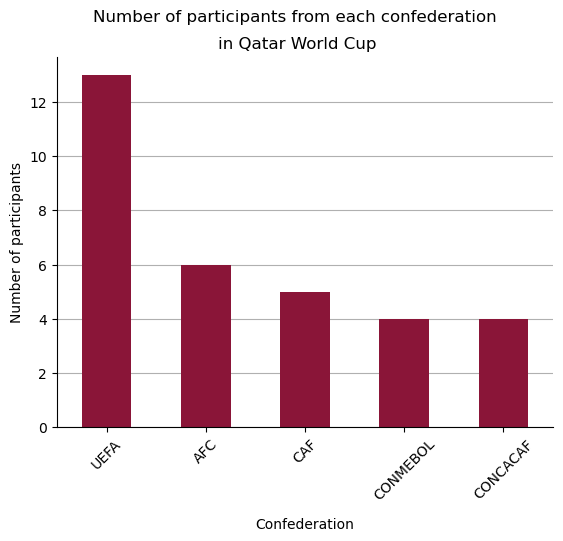

In [16]:
#How many countries does each confederation ahve in the World Cup?

barplot = countries_football_all['confederation'].value_counts().plot(kind = 'bar', 
                                                                      ylabel = 'frequency', 
                                                                      color = '#8A1538', # Qatar flag color
                                                                      zorder=2) #zorder helps to order plt. graph parts
barplot.grid(axis = 'y', zorder = 0) #xlines arent informative
barplot.spines.right.set_visible(False) #rather not have a square
barplot.spines.top.set_visible(False)
plt.xticks(rotation = 45) #long names in xticks
plt.suptitle('Number of participants from each confederation \nin Qatar World Cup', linespacing = 2)
plt.xlabel("Confederation", labelpad = 10)
plt.ylabel("Number of participants")
plt.show()

#print(countries_football_all['confederation'].value_counts())

#The UEFA has more participating countries than other confederations

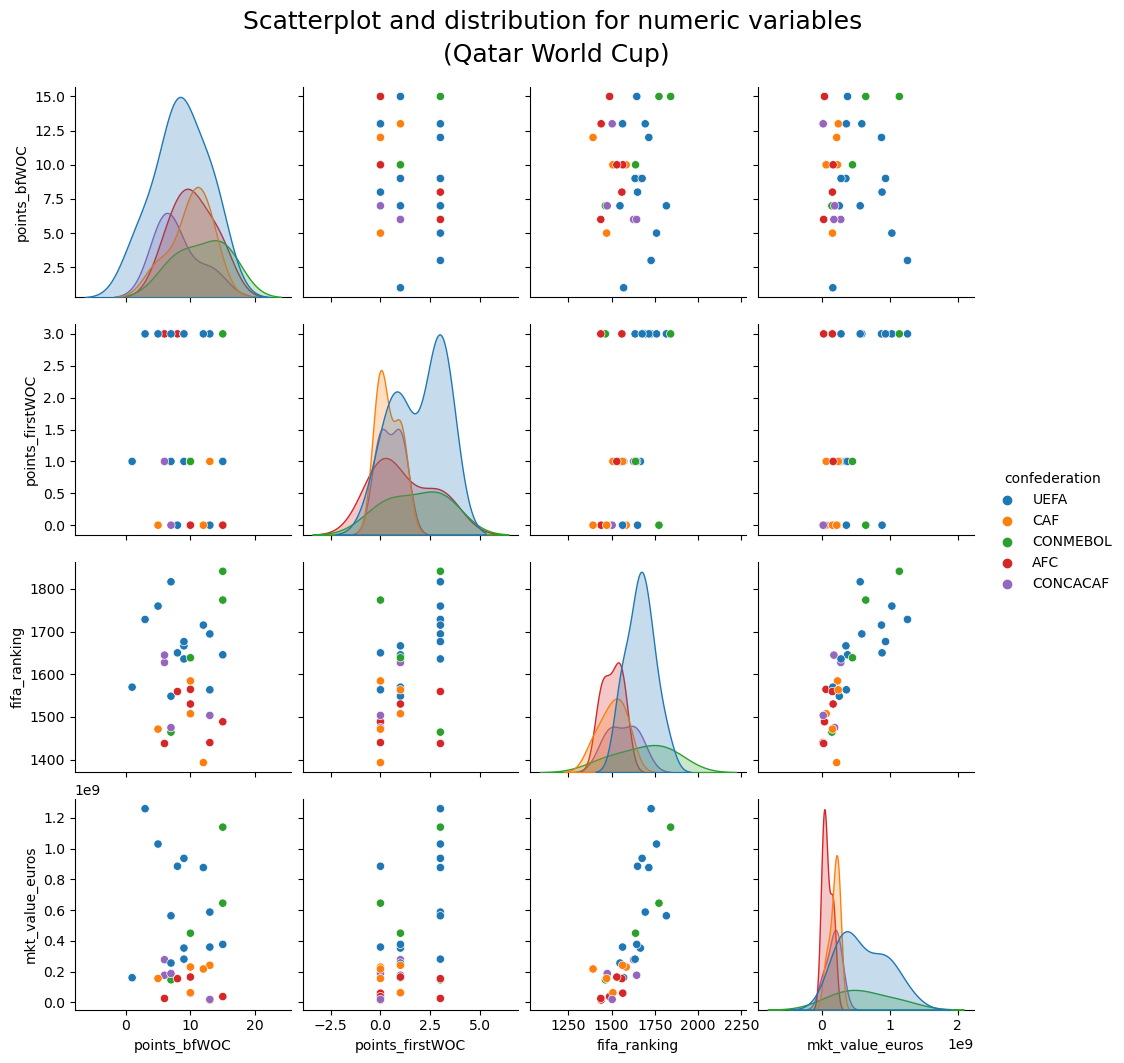

In [22]:
#Get a general view of relationships between numeric data, colored by confederation
parirplot = sns.pairplot(countries_football_all, hue = 'confederation')
parirplot.fig.suptitle('Scatterplot and distribution for numeric variables \n(Qatar World Cup)', y=1.06, fontsize=18, linespacing = 1.5)
plt.show()

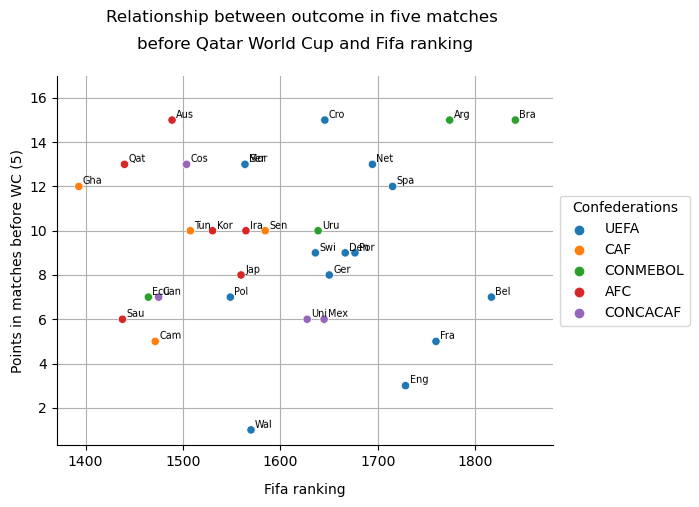

In [25]:
#Apparently there is no relationship for points before World Cup and Fifa ranking
#lets look closer to it with a scatterplot
scatterFifaBfWOC = sns.scatterplot(data=countries_football_all, 
                                   x='fifa_ranking', 
                                   y='points_bfWOC', 
                                   hue='confederation',
                                   zorder=3) #confederation may be of relevance for analize variables

scatterFifaBfWOC.legend(title = 'Confederations', loc='center left', 
                        bbox_to_anchor=(1, 0.5)) #position legend outside the graph

scatterFifaBfWOC.set_title('Relationship between outcome in five matches \nbefore Qatar World Cup and Fifa ranking', 
                           y = 1.05, linespacing = 2)

#Rather not have square
scatterFifaBfWOC.spines.right.set_visible(False) 
scatterFifaBfWOC.spines.top.set_visible(False)

plt.xlabel("Fifa ranking", labelpad = 10)
plt.ylabel("Points in matches before WC (5)")

plt.grid(zorder = 0) #grid makes values easier to follow

#Add labels to points
for i in range(countries_football_all.shape[0]):         #for length of dataframe
    plt.text(x=countries_football_all.fifa_ranking[i]+4, #create one text with this coordinates and 
             y=countries_football_all.points_bfWOC[i]+0.1,
             s=countries_football_all.country_name[i][:3], #this string, [:3] for less overlap
             fontdict=dict(size=7),
             rotation=1)
    
plt.xlim(right = 1880) #names inside graph
plt.ylim(top = 17)
plt.show()

#It looks like confederation is a better proxy for fifa ranking than points
#before WOC which apparently isn't related 

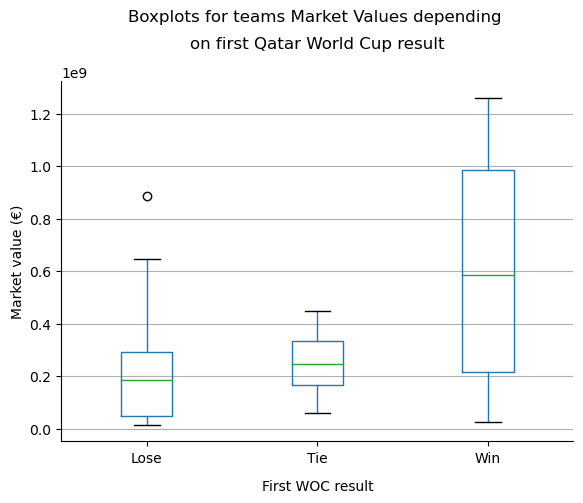

In [26]:
#As match in WOC only has 3 levels it may be better to analize with a boxplot
bpFirstMatch = countries_football_all.boxplot(column='mkt_value_euros', by='points_firstWOC')
bpFirstMatch.spines.right.set_visible(False) #rather not have square
bpFirstMatch.spines.top.set_visible(False)
bpFirstMatch.set_title('') #erase extra title in boxplot
plt.suptitle('Boxplots for teams Market Values depending \non first Qatar World Cup result', y = 1.05, linespacing = 2)
plt.xticks([1, 2, 3], ['Lose', 'Tie', 'Win'])
plt.ylabel("Market value (€)")
plt.xlabel("First WOC result", labelpad = 10)
plt.gca().xaxis.grid(False) #not informative
plt.show()

#Although there seems to be a retlation between market value 
#and game result it does not seem a very strong one

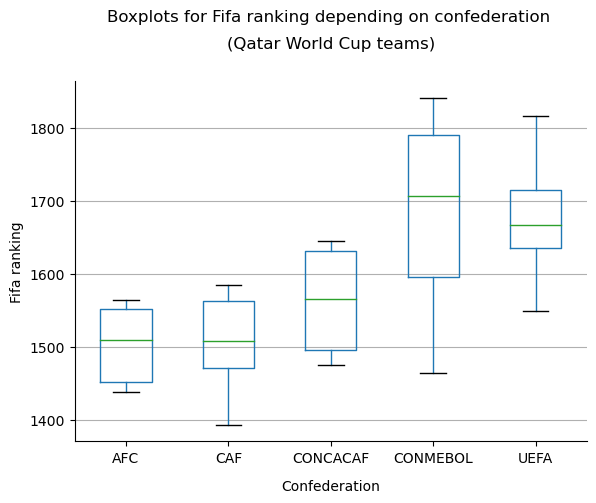

In [30]:
#Check for the distribution of fifa ranking for each conferderation
bpFifaConf = countries_football_all.boxplot(column='fifa_ranking', by='confederation')
bpFifaConf.spines.right.set_visible(False) #rather not have square
bpFifaConf.spines.top.set_visible(False)
bpFifaConf.set_title('') #erase extra title in boxplot
plt.suptitle('Boxplots for Fifa ranking depending on confederation \n(Qatar World Cup teams)', y = 1.05, linespacing = 2)
plt.ylabel("Fifa ranking")
plt.xlabel("Confederation", labelpad = 10)
plt.gca().xaxis.grid(False)

plt.show()

#CONMEBOL and UEFA show a greater dispersion of the value of their teams

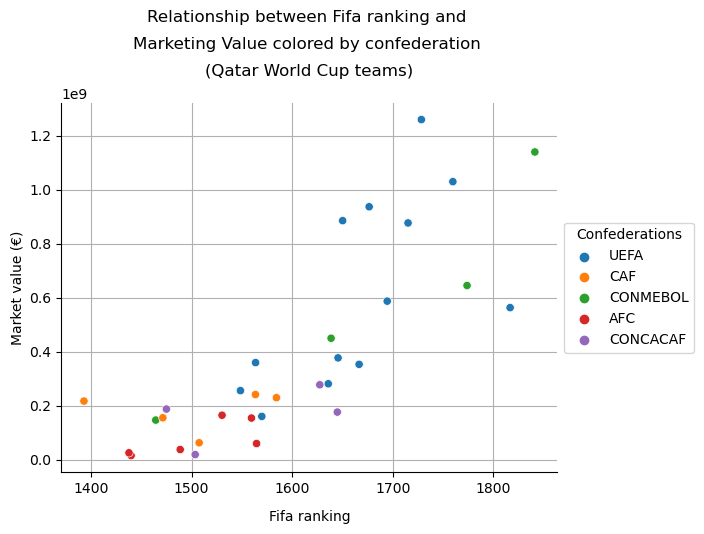

In [31]:
# The pairplot shows that fifa_ranking and mkt_value_euros are the variables with the strongest relation 
# I'll do a scatterplot to look at it more closely

scatterFifaMkt = sns.scatterplot(data=countries_football_all, x='fifa_ranking', y='mkt_value_euros', hue='confederation', zorder=3) #confederation may be of relevance for analize variables
scatterFifaMkt.spines.right.set_visible(False) #rather not have square
scatterFifaMkt.spines.top.set_visible(False)
scatterFifaMkt.set_title('Relationship between Fifa ranking and \nMarketing Value colored by confederation \n(Qatar World Cup teams)', y = 1.05, linespacing = 2)
scatterFifaMkt.legend(title = 'Confederations', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1) 
plt.xlabel("Fifa ranking", labelpad = 10)
plt.ylabel("Market value (€)")
plt.grid(zorder=0)
plt.show()

#le9 stands for 9 0s behind "y" values

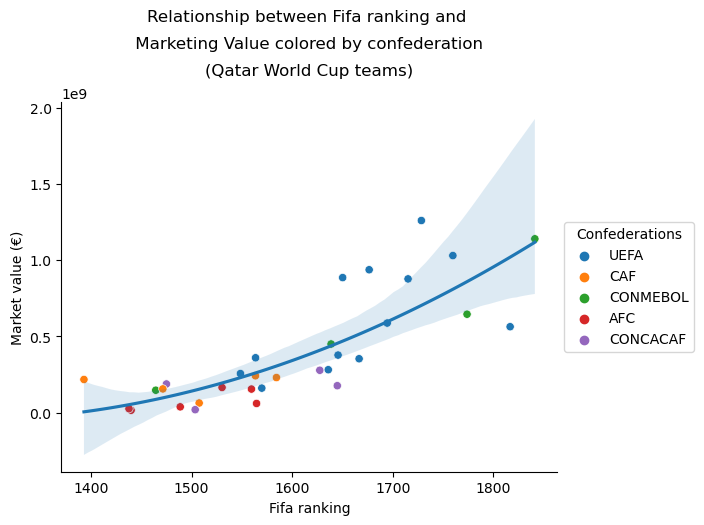

In [32]:
# The teams ranking aparently predicts market value at some point. The relation seems to be cuadratic. 
# I'll add a cuadratic trend line to the graph

scatterFifaMkt = sns.scatterplot(data=countries_football_all, x='fifa_ranking', y='mkt_value_euros', hue='confederation')
scatterFifaMkt.spines.right.set_visible(False) #rather not have square
scatterFifaMkt.spines.top.set_visible(False)
scatterFifaMkt.set_title('Relationship between Fifa ranking and \n Marketing Value colored by confederation \n(Qatar World Cup teams)', y = 1.05, linespacing = 2)
scatterFifaMkt.legend(title = 'Confederations', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1) #position legend outside the graph

#fit line
sns.regplot(data=countries_football_all, x='fifa_ranking', y='mkt_value_euros', order = 2, scatter = False)
scatterFifaMkt.set_ylabel("Market value (€)")
scatterFifaMkt.set_xlabel("Fifa ranking")
plt.show()

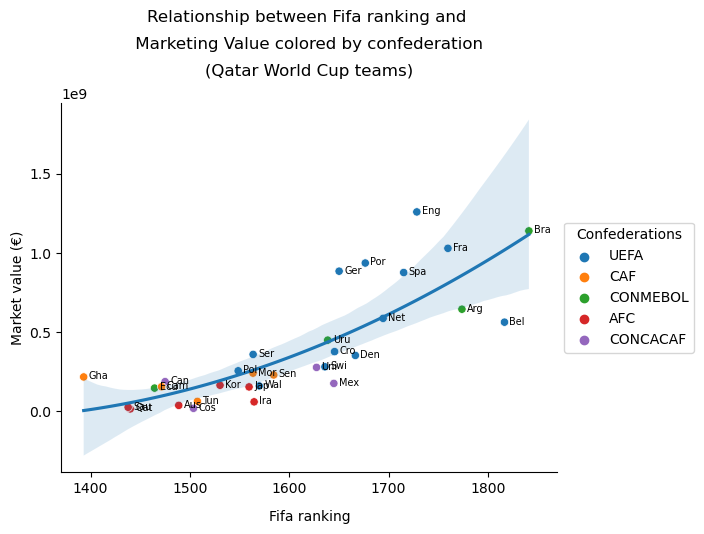

In [33]:
# Some UEFA teams look like outliers. They are apparently moving the intercept up. 
# I'll check who they are adding tags
scatterFifaMkt = sns.scatterplot(data=countries_football_all, x='fifa_ranking', y='mkt_value_euros', hue='confederation')
scatterFifaMkt.spines.right.set_visible(False) #rather not have square
scatterFifaMkt.spines.top.set_visible(False)
scatterFifaMkt.set_title('Relationship between Fifa ranking and \n Marketing Value colored by confederation \n(Qatar World Cup teams)', y = 1.05, linespacing = 2)
scatterFifaMkt.legend(title = 'Confederations', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1) #position legend outside the graph
sns.regplot(data=countries_football_all, x='fifa_ranking', y='mkt_value_euros', order = 2, scatter = False)
scatterFifaMkt.set_ylabel("Market value (€)")
scatterFifaMkt.set_xlabel("Fifa ranking", labelpad = 10)
for i in range(countries_football_all.shape[0]):
    plt.text(x=countries_football_all.fifa_ranking[i]+5,
             y=countries_football_all.mkt_value_euros[i]-15000000,
             s=countries_football_all.country_name[i][:3],
             fontdict=dict(size=7),
             rotation=0)

plt.xlim(right = 1870) #fit tags

plt.show()

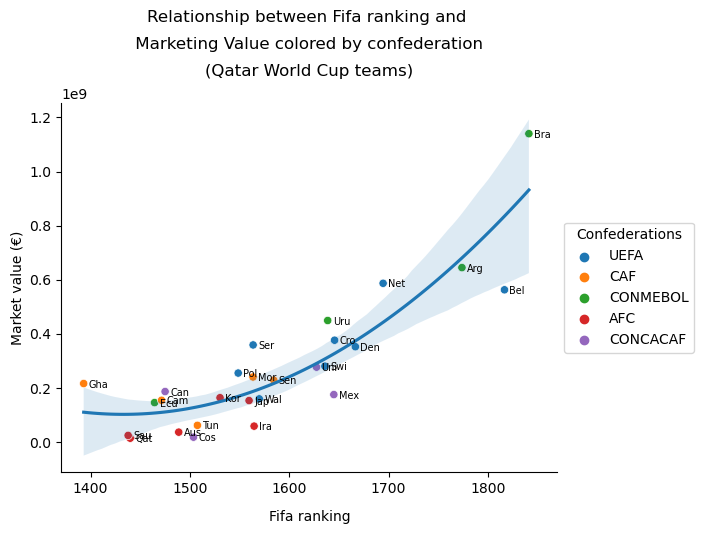

In [34]:
# Apparently the outliers are the 5 most popular european teams of the World Cup
# I'll exclude this 5 countries to get a more accurate line
outliers = ['Germany', 'Portugal', 'Spain', 'France', 'England']

#New way leraned to remove rows with "~"
no_outliers = countries_football_all[~countries_football_all['country_name'].isin(outliers)].reset_index()
#reset_index is required to add labels

scatterFifaMkt = sns.scatterplot(data=no_outliers, x='fifa_ranking', y='mkt_value_euros', hue='confederation')
scatterFifaMkt.spines.right.set_visible(False) #rather not have square
scatterFifaMkt.spines.top.set_visible(False)
scatterFifaMkt.set_title('Relationship between Fifa ranking and \n Marketing Value colored by confederation \n(Qatar World Cup teams)', y = 1.05, linespacing = 2)
scatterFifaMkt.legend(title = 'Confederations', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1) #position legend outside the graph
sns.regplot(data=no_outliers, x='fifa_ranking', y='mkt_value_euros', order = 2, scatter = False)
scatterFifaMkt.set_ylabel("Market value (€)")
scatterFifaMkt.set_xlabel("Fifa ranking", labelpad = 10)
for i in range(no_outliers.shape[0]):
    plt.text(x=no_outliers.fifa_ranking[i]+5,
             y=no_outliers.mkt_value_euros[i]-15000000,
             s=no_outliers.country_name[i][:3],
             fontdict=dict(size=7),
             rotation=0)

plt.xlim(right = 1870)

plt.show()

In [35]:
# This model looks quite accurate, gonna calculate equation
import numpy as np

In [36]:
coefs = np.polyfit(x=no_outliers['fifa_ranking'], y=no_outliers['mkt_value_euros'], deg = 2) 
coefs

array([ 4.97165121e+03, -1.42482177e+07,  1.03115054e+10])